In [13]:
!pip install plotly
!pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install seaborn

In [14]:
import sklearn as sk
import numpy as np
import plotly.express as px
import pandas as pd
import seaborn as sns

In [15]:
# Loading Datasets
data = pd.read_csv('./Crime_Data_from_2020_to_Present.csv', usecols=['DR_NO','AREA NAME' ,'Date Rptd', 'DATE OCC', 'TIME OCC', 'LOCATION', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Weapon Desc', 'Premis Desc', 'LAT', 'LON'], header=0)

encoded = pd.DataFrame()

data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,Weapon Desc,LOCATION,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,Wilshire,VEHICLE - STOLEN,0,M,STREET,NaN,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,Central,BURGLARY FROM VEHICLE,47,M,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,Southwest,BIKE - STOLEN,19,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,1400 W 37TH ST,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,CLOTHING STORE,NaN,14000 RIVERSIDE DR,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,Hollenbeck,VEHICLE - STOLEN,0,NaN,STREET,NaN,200 E AVENUE 28,34.0820,-118.2130


In [16]:
# Time Conversion

# Combine DATE OCC and TIME OCC into a single datetime column
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
#data['DATE OCC'] = pd.to_datetime(data['DATE OCC'] + ' ' + data['TIME OCC'], format='%Y-%m-%d %M:%S')
# Convert the datetime column to Unix timestamps
encoded['UNIX_TIMESTAMP'] = data['DATE OCC'].apply(lambda x: x.timestamp())
encoded['TIME OCC'] = data['TIME OCC'].copy()
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,Weapon Desc,LOCATION,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,2020-03-01,2130,Wilshire,VEHICLE - STOLEN,0,M,STREET,NaN,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,1800,Central,BURGLARY FROM VEHICLE,47,M,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,2020-11-04,1700,Southwest,BIKE - STOLEN,19,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,1400 W 37TH ST,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,2037,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,CLOTHING STORE,NaN,14000 RIVERSIDE DR,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,2020-09-09,630,Hollenbeck,VEHICLE - STOLEN,0,NaN,STREET,NaN,200 E AVENUE 28,34.0820,-118.2130
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005144,252104053,01/19/2025 12:00:00 AM,2025-01-17,1530,Topanga,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,M,JUNIOR HIGH SCHOOL,NaN,22200 ELKWOOD ST,34.2128,-118.6103
1005145,250304214,02/23/2025 12:00:00 AM,2025-02-21,1530,Southwest,VEHICLE - STOLEN,0,NaN,STREET,NaN,3600 MCCLINTOCK AV,34.0212,-118.2895
1005146,250304203,02/20/2025 12:00:00 AM,2025-02-13,2100,Southwest,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",0,NaN,PARKING LOT,NaN,2600 ELLENDALE PL,34.0307,-118.2923
1005147,250504051,01/14/2025 12:00:00 AM,2025-01-14,1250,Harbor,ROBBERY,15,F,HIGH SCHOOL,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",24300 WESTERN AV,33.8046,-118.3074


In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the 'Crm Cd Desc' column
label_encoder.fit(data['Crm Cd Desc'])
# Transform the 'Crm Cd Desc' column
encoded['Crm Cd Desc'] = label_encoder.transform(data['Crm Cd Desc'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['AREA NAME'])
# Transform the 'AREA NAME' column
encoded['AREA NAME'] = label_encoder.transform(data['AREA NAME'])

# Fit the LabelEncoder to the 'AREA NAME' column
gender = label_encoder.fit(data['Vict Sex'])
# Transform the 'AREA NAME' column
encoded['Vict Sex'] = label_encoder.transform(data['Vict Sex'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['Premis Desc'])
# Transform the 'AREA NAME' column
encoded['Premis Desc'] = label_encoder.transform(data['Premis Desc'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['Weapon Desc'])
# Transform the 'AREA NAME' column
encoded['Weapon Desc'] = label_encoder.transform(data['Weapon Desc'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['LOCATION'])
# Transform the 'AREA NAME' column
encoded['LOCATION'] = label_encoder.transform(data['LOCATION'])


encoded.to_csv('encoded.csv', index=True)
data.to_csv('data.csv', index=True)
encoded


,UNIX_TIMESTAMP,TIME OCC,Crm Cd Desc,AREA NAME,Vict Sex,Premis Desc,Weapon Desc,LOCATION
0,1.583021e+09,2130,134,20,3,266,79,21689
1,1.581120e+09,1800,21,1,3,29,79,1868
2,1.604448e+09,1700,11,15,4,207,79,13379
3,1.583798e+09,2037,106,17,3,40,79,13577
4,1.599610e+09,630,134,5,5,266,79,22977
...,...,...,...,...,...,...,...,...
1005144,1.737072e+09,1530,123,16,3,99,79,26684
1005145,1.740096e+09,1530,134,15,5,266,79,34184
1005146,1.739405e+09,2100,135,15,5,227,79,29356
1005147,1.736813e+09,1250,100,4,1,91,65,28634


                UNIX_TIMESTAMP  TIME OCC  Crm Cd Desc  AREA NAME  Vict Sex  \
UNIX_TIMESTAMP        1.000000  0.003451     0.077026   0.002252  0.074169   
TIME OCC              0.003451  1.000000    -0.006331   0.010838  0.045423   
Crm Cd Desc           0.077026 -0.006331     1.000000   0.018829  0.273531   
AREA NAME             0.002252  0.010838     0.018829   1.000000 -0.009143   
Vict Sex              0.074169  0.045423     0.273531  -0.009143  1.000000   
Premis Desc          -0.018637  0.014267     0.023307  -0.020254  0.020294   
Weapon Desc           0.065369 -0.007935     0.392798   0.049390  0.130391   
LOCATION             -0.019063  0.014722    -0.037267  -0.051573  0.021172   

                Premis Desc  Weapon Desc  LOCATION  
UNIX_TIMESTAMP    -0.018637     0.065369 -0.019063  
TIME OCC           0.014267    -0.007935  0.014722  
Crm Cd Desc        0.023307     0.392798 -0.037267  
AREA NAME         -0.020254     0.049390 -0.051573  
Vict Sex           0.020294     

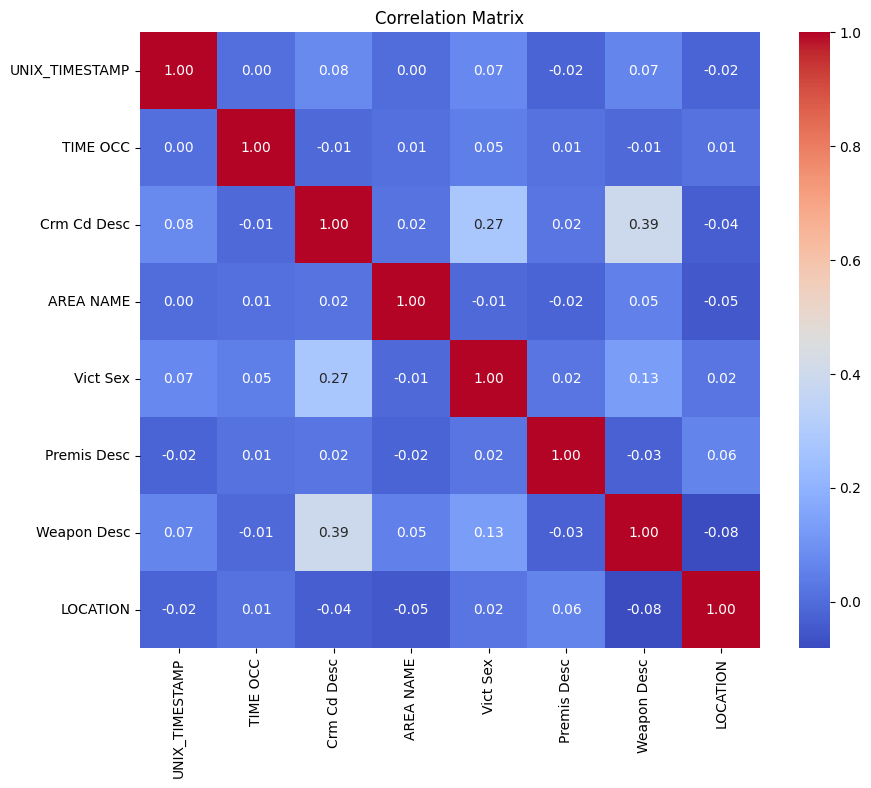

In [18]:
import matplotlib.pyplot as plt

# Assuming 'encoded' is your DataFrame with encoded data
# Compute the correlation matrix
correlation_matrix = encoded.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

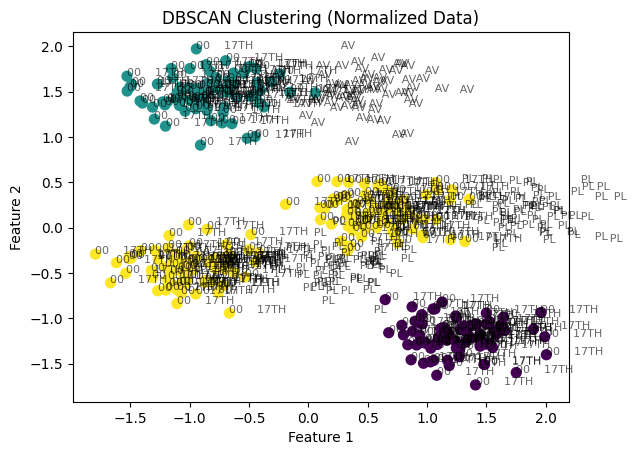

In [19]:
from sklearn.preprocessing import StandardScaler

# Daten normalisieren
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# DBSCAN-Modell erstellen
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps: Radius, min_samples: Mindestanzahl von Punkten in einem Cluster
labels = dbscan.fit_predict(X_normalized)

# Ergebnisse visualisieren
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering (Normalized Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

for i, label in enumerate(labels):
    plt.text(X_normalized[i, 0], X_normalized[i, 1], gender.inverse_transform([label])[0], fontsize=8, color='black', alpha=0.6)
    
plt.show()
